In [11]:
using DifferentialEquations
using PyDSTool
using Plots; gr()

Plots.GRBackend()

In [12]:
# see DifferentialEquations version number
display(Pkg.installed("DifferentialEquations"))

# see PyDSTool version number
display(Pkg.installed("PyDSTool"))

v"4.5.0"

v"0.4.0"

# Solving ODE

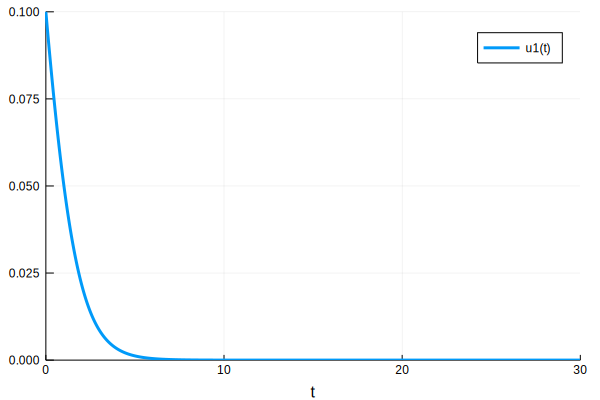

In [13]:
alpha, k_g, k, S = (0.02, 5.0, 1.0, 0.0)
f2(u,p,t) = alpha*S + k_g*u^(2.0)/(1.0+u)^(2.0) - k*u
u0 = 0.1 # initial condition
tspan = (0.0,30.0) # integration time
prob = ODEProblem(f2,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
plot(sol)

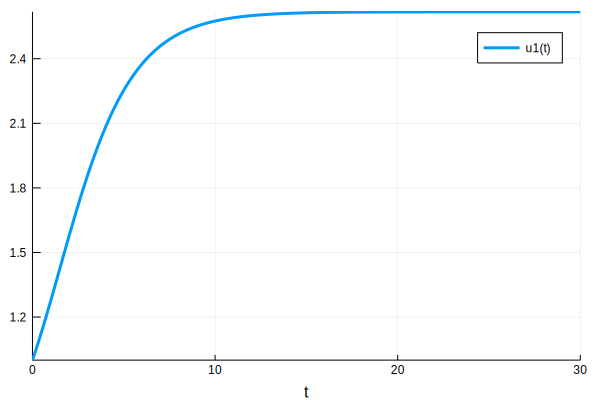

In [14]:
u0 = 1.0 # initial condition
prob = ODEProblem(f2,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
plot(sol)

# Preparing bifurcations

In [15]:
f = @ode_def GataSystem begin
 dGata3= alpha*S + (k_g*Gata3^2.0)/((1.0+Gata3)^2.0)-k*Gata3
end alpha k_g k S

(::GataSystem) (generic function with 9 methods)

In [16]:
u0 = 0 # initial condition
tspan = [0;30] # integration time
p = [0.02, 5.0, 1.0, 0.0] # parameter array

4-element Array{Float64,1}:
 0.02
 5.0 
 1.0 
 0.0 

In [17]:
dsargs = build_ode(f,u0,tspan,p)

ode = ds[:Generator][:Vode_ODEsystem](dsargs)
ode[:set](pars = Dict("S"=>0.0)) #initialize with a parameter (the initial value of the bifurcation parameter)
ode[:set](ics  = Dict("Gata3"=>0.001)) # initial condition: close to a steady state

# Experiment 1: tiny steps -> lower branch OK

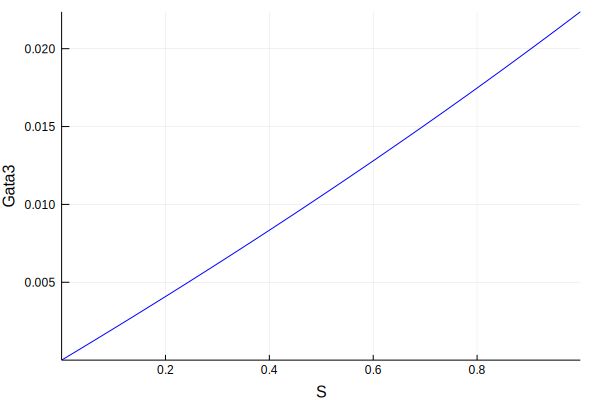

In [18]:
PC = ds[:ContClass](ode)

bif = bifurcation_curve(PC,
                        "EP-C",
                        ["S"], #S is the bifurcation parameter
                        max_num_points=1000,
                        max_stepsize=1e-3,
                        min_stepsize=1e-4,
                        stepsize=1e-3,
                        loc_bif_points="all",
                        calc_stab=true,
                        save_eigen=true,
                        name="EQ1",
                        print_info=true)

plot(bif,(:S,:Gata3))

# Experiment 2: more number of points -> lower branch "gets" unstable

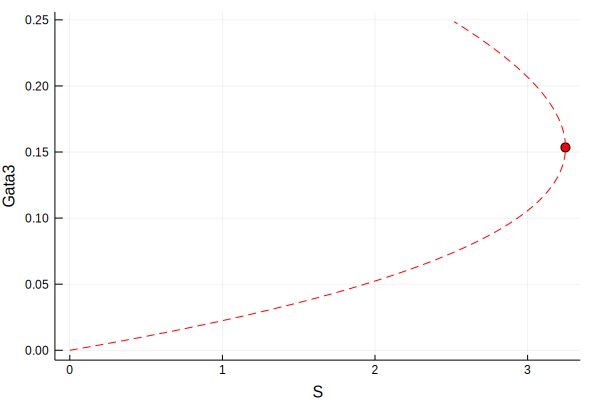

In [19]:
PC = ds[:ContClass](ode)
bif = bifurcation_curve(PC,
                        "EP-C",
                        ["S"], #S is the bifurcation parameter
                        max_num_points=4000,
                        max_stepsize=1e-3,
                        min_stepsize=1e-4,
                        stepsize=1e-3,
                        loc_bif_points="all",
                        calc_stab=true,
                        save_eigen=true,
                        name="EQ1",
                        print_info=true)

plot(bif,(:S,:Gata3))

# Experiment 3: greater steps -> getting reversed stability

  providing a graphing interface
PyCont curve EQ1 (type EP-C)
Using model: GataSystem

Model Info
---------- 

  Variables : Gata3
  Parameters: alpha, S, k, k_g

Continuation Parameters
----------------------- 

name  =  EQ1
auxpars  =  []
freepars  =  ['S']
MaxNumPoints  =  1000
MaxCorrIters  =  5
MaxTestIters  =  10
MaxStepSize  =  0.001
MinStepSize  =  0.0001
StepSize  =  0.001
VarTol  =  1e-06
FuncTol  =  1e-06
TestTol  =  0.0001
LocBifPoints  =  ['B', 'SP', 'BP', 'LP']
verbosity  =  1
ClosedCurve  =  50
SaveJacobian  =  False
SaveEigen  =  True
Corrector  =  <bound method EquilibriumCurve._MoorePenrose of PyCont curve EQ1 (type EP-C)>
UseAuto  =  False
StopAtPoints  =  []
SPOut  =  None


Special Points
-------------- 

P1, P2
LP Point found 
PyCont curve EQ1 (type EP-C)
Using model: GataSystem

Model Info
---------- 

  Variables : Gata3
  Parameters: alpha, S, k, k_g

Continuation Parameters
----------------------- 

name  =  EQ1
auxpars  =  []
freepars  =  ['S']
MaxNumPoints  

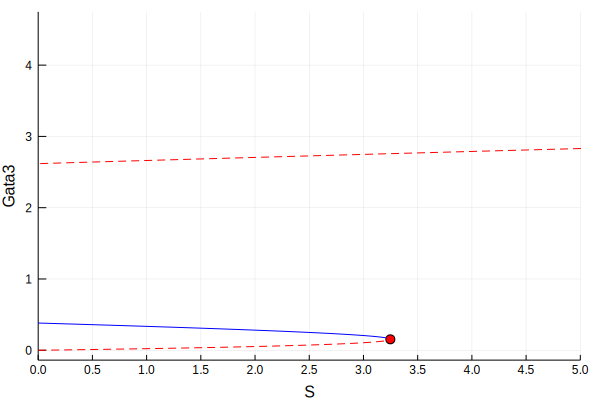

In [20]:
PC = ds[:ContClass](ode)
bif = bifurcation_curve(PC,
                        "EP-C",
                        ["S"], #S is the bifurcation parameter
                        max_num_points=1000,
                        max_stepsize=1e-1,
                        min_stepsize=1e-4,
                        stepsize=1e-2,
                        loc_bif_points="all",
                        calc_stab=true,
                        save_eigen=true,
                        name="EQ1",
                        print_info=true)

plot(bif,(:S,:Gata3))
plot!(xlims=(0,5),xticks=0:0.5:5)